Training and testing on Semi-supervised Dataset 1
              precision    recall  f1-score   support

    Critical       0.91      1.00      0.95       600
      Normal       1.00      0.85      0.92       400

    accuracy                           0.94      1000
   macro avg       0.95      0.93      0.94      1000
weighted avg       0.95      0.94      0.94      1000



/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


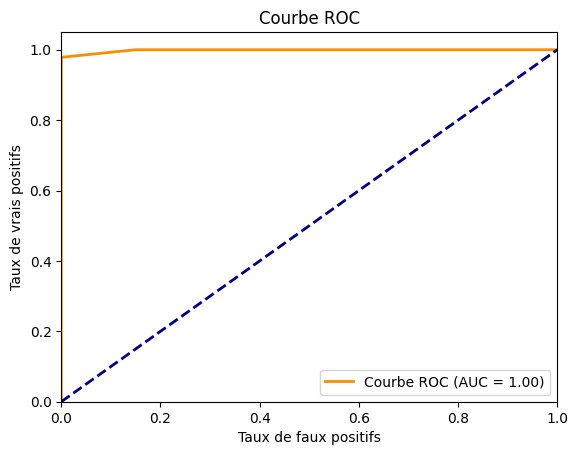

Precision: 0.9090909090909091
F1 Score: 0.9523809523809523
Recall: 1.0
Training and testing on Semi-supervised Dataset 2
              precision    recall  f1-score   support

    Critical       0.82      1.00      0.90       100
      Normal       1.00      0.78      0.88       100

    accuracy                           0.89       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.91      0.89      0.89       200



/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


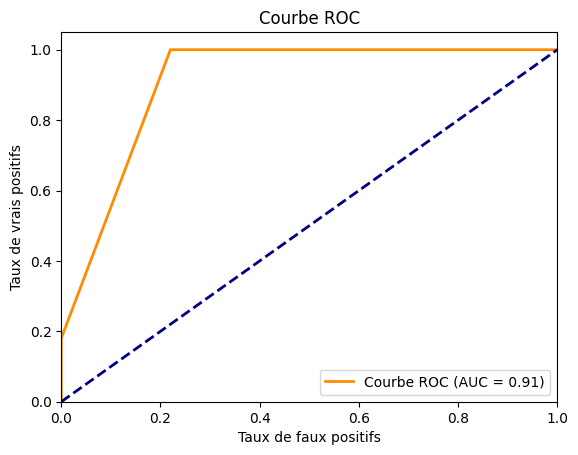

Precision: 0.819672131147541
F1 Score: 0.9009009009009009
Recall: 1.0
Training and testing on Semi-supervised Dataset 3
              precision    recall  f1-score   support

    Critical       0.93      1.00      0.96       500
      Normal       1.00      0.92      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


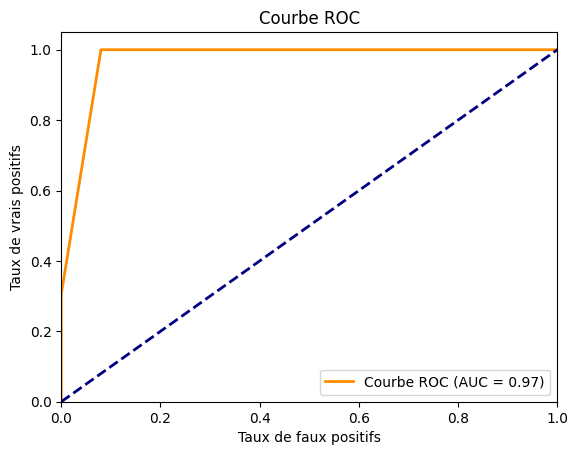

Precision: 0.9259259259259259
F1 Score: 0.9615384615384615
Recall: 1.0


In [19]:
import pandas as pd
import numpy as np
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report, roc_curve, auc, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt

# Liste des noms de fichiers de train et de test
train_files = ['Semi_data1.csv', 'Semi_data2.csv', 'Semi_data3.csv']
test_files = ['Original1.csv', 'Original2.csv', 'Original3.csv']

# Initialisation du modèle de propagation de labels
model = LabelPropagation()

# Boucle sur les jeux de données pour la mise à jour
for i, (train_file, test_file) in enumerate(zip(train_files, test_files)):
    print(f"Training and testing on Semi-supervised Dataset {i + 1}")

    # Chargement du dataset d'entraînement
    dataset_train = pd.read_csv(train_file)

    # Séparation des données et des classes pour l'entraînement
    X_labeled = dataset_train[~dataset_train['Class'].isnull()].drop('Class', axis=1)
    X_unlabeled = dataset_train[~dataset_train['Class'].isnull()].drop('Class', axis=1)
    y_labeled = dataset_train[~dataset_train['Class'].isnull()]['Class']

    # Conversion des classes en valeurs numériques
    label_map = {'Critical': 0, 'Normal': 1}
    y_numeric = np.array([label_map[label] for label in y_labeled])

    # Entraînement du modèle sur les données étiquetées
    model.fit(X_labeled, y_numeric)

    # Chargement du dataset de test
    dataset_test = pd.read_csv(test_file)

    # Séparation des données et des classes pour le test
    X_test = dataset_test.drop('Class', axis=1)
    y_true = dataset_test['Class']
    # Prédiction des classes pour les données de test
    y_pred = model.predict(X_test)

    # Conversion des prédictions en chaînes de caractères
    y_pred_labels = np.array(['Critical' if label == 0 else 'Normal' for label in y_pred])


    # Calcul des métriques de classification pour le test
    classification_metrics = classification_report(y_true, y_pred_labels, target_names=['Critical', 'Normal'])
    print(classification_metrics)

    # Calcul de la courbe ROC
    y_prob = model.predict_proba(X_test)
    y_prob = np.nan_to_num(y_prob, nan=0.5)
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 0], pos_label='Critical')
    roc_auc = auc(fpr, tpr)

    # Affichage de la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Courbe ROC')
    plt.legend(loc="lower right")
    plt.show()

    # Calcul de la précision, du score F1 et du rappel
    precision = precision_score(y_true, y_pred_labels, pos_label='Critical')
    f1 = f1_score(y_true, y_pred_labels, pos_label='Critical')
    recall = recall_score(y_true, y_pred_labels, pos_label='Critical')

    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
